

# Exploring the fit bit kaggle dataset 

This notebook aims to explore and analyze the Fitbit dataset. The dataset contains various CSV files with information on daily activities, calories burned, heart rate, sleep patterns, and more. We will start by listing the directory structure of the dataset, then proceed to load and inspect some key CSV files. Basic statistics and visualizations will be generated to understand the data better.

# Table of Contents

1. [Ask](#Ask)
   - [Accessing the Kaggle Dataset](#accessing-the-kaggle-dataset)
   - [Data Exploration](#data-exploration)
2. [Prepare](#prepare)
3. [Process](#process)
4. [Analyze](#analyze)
5. [Share](#share)
6. [Act](#act)


# Ask
[Back to Table of Contents](#table-of-contents)


The business task is to use the Fitbit Fitness Tracker Data to analyze trends in users’ daily habits and provide insights to help guide marketing strategy for Bellabeat. The main questions to guide the analysis are:

1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

The key stakeholders are Urška Sršen – cofounder and Chief Creative Officer; Sando Mur – cofounder and key member of the executive team.

# Prepare 

Deliverable: A description of all data sources used.



## Accessing the Kaggle Dataset
[Back to Table of Contents](#table-of-contents)

This repository includes a GitHub Actions workflow that continuously tests the process of connecting to the Kaggle API, using github secrets to pass username and key securely as environment variables to the automated workflow, and then checks if the files are correctly downloaded and unzipped, if so, a CSV file is imported and printed using pandas.

In this research notebook we will use an analogue operation to gather the dataset, but instead of using secrets, the machine that runs this notebook looks for the kaggle.json file that should be in the .kaggle/ folder, to authenticate and download the file. (This file should be included in the .gitignore file, so it's not commited/shared).

We can make sure all libraries for this step are imported:


In [1]:
import os # to create the directory
import kaggle # To download the dataset
import zipfile # To extract the dataset

 

And can create the data directory that will hold the dataset: `../data/`, by using the `makedirs` function from the `os` module.



In [2]:
# Step 1: Ensure the data directory exists
data_dir = '../data/'
os.makedirs(data_dir, exist_ok=True)

Then, since in the `~/.kaggle/` folder we have saved our kaggle credentials (mine are not commited to this repository) the `kaggle.api.dataset_download_files` function uses it automatically to authenticate with the api. 

Once we define the dataset identifier as `dataset = 'arashnic/fitbit'` the function accesses to the dataset and downloads it: 

In [3]:
# Step 2: Use Kaggle API to download the dataset
dataset = 'arashnic/fitbit'  # The dataset identifier on Kaggle
kaggle.api.dataset_download_files(dataset, path=data_dir, unzip=False)

Dataset URL: https://www.kaggle.com/datasets/arashnic/fitbit


Once the file has been downloaded, It can be unzipped as follows:

* First the paths of where the file is and where it is going to be extracted are defined: 

In [4]:

zip_file_path = '../data/fitbit.zip'
extract_to_path = '../data/'

* Then, the zip ifle is extracted. 

In [5]:
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

Now that we have successfully unzipped the files, we can take a look to what we are dealing with, by printing the structure of the files within the `../data/` folder:

In [6]:
# print the structure of the ../data/ directory

def print_directory_structure(root_dir, indent=''):
    for item in os.listdir(root_dir):
        item_path = os.path.join(root_dir, item)
        if os.path.isdir(item_path):
            print(f"{indent}📁 {item}/")
            print_directory_structure(item_path, indent + '    ')
        else:
            print(f"{indent}📄 {item}")

# Define the root directory
root_directory = '../data'

# Print the directory structure
print(f"Directory structure of {root_directory}:")
print_directory_structure(root_directory)


Directory structure of ../data:
📄 fitbit.zip
📁 mturkfitbit_export_4.12.16-5.12.16/
    📁 Fitabase Data 4.12.16-5.12.16/
        📄 minuteIntensitiesNarrow_merged.csv
        📄 minuteStepsWide_merged.csv
        📄 dailyActivity_merged.csv
        📄 hourlySteps_merged.csv
        📄 dailyIntensities_merged.csv
        📄 minuteCaloriesWide_merged.csv
        📄 hourlyCalories_merged.csv
        📄 minuteStepsNarrow_merged.csv
        📄 dailyCalories_merged.csv
        📄 minuteCaloriesNarrow_merged.csv
        📄 weightLogInfo_merged.csv
        📄 hourlyIntensities_merged.csv
        📄 dailySteps_merged.csv
        📄 minuteMETsNarrow_merged.csv
        📄 heartrate_seconds_merged.csv
        📄 minuteSleep_merged.csv
        📄 minuteIntensitiesWide_merged.csv
        📄 sleepDay_merged.csv
📁 mturkfitbit_export_3.12.16-4.11.16/
    📁 Fitabase Data 3.12.16-4.11.16/
        📄 minuteIntensitiesNarrow_merged.csv
        📄 dailyActivity_merged.csv
        📄 hourlySteps_merged.csv
        📄 hourlyCalorie

## Data Exploration
 
There are different kinds of data in these folder, one sample from march 12 to april 11 of 2016, and other from april 12 to may 12 of 2016.

We will first assess all data files present in the folder of the first month, checking for missing values would be great first step. Also, since there are several datetime or date data, printing the first date value of each file will allow us to understand the granularity of the data.


In [7]:
import os
import pandas as pd

# Define the root directory containing the CSV files
root_directory = '../data/mturkfitbit_export_4.12.16-5.12.16/'  # Replace with your root directory path

# Initialize a list to store the results
results = []

# Function to read and process each file
def process_file(filepath):
    # Read the CSV file
    df = pd.read_csv(filepath)
    
    # Get the filename
    filename = os.path.basename(filepath)
    
    # Identify columns with missing values
    missing_values = df.isna().sum()
    missing_columns = missing_values[missing_values > 0]
    
    # Identify datetime columns and print the first value
    datetime_columns = df.select_dtypes(include=['datetime64', 'object']).columns
    
    # Check for the ID column and count unique values
    unique_ids = df['Id'].nunique() if 'Id' in df.columns else None
    
    for col in datetime_columns:
        try:
            first_value = df[col].dropna().iloc[0]
        except IndexError:
            first_value = 'Empty or NaN'
        
        if col in missing_columns.index:
            nan_indices = df[df[col].isna()].index.tolist()
            results.append({
                'File': filename,
                'Datetime Column': col,
                'Missing Values': missing_columns[col],
                'NaN Indices': nan_indices,
                'First Datetime Value': first_value,
                'Unique ID Count': unique_ids
            })
        else:
            results.append({
                'File': filename,
                'Datetime Column': col,
                'Missing Values': 0,
                'NaN Indices': [],
                'First Datetime Value': first_value,
                'Unique ID Count': unique_ids
            })

# Walk through all directories and files
for dirpath, _, filenames in os.walk(root_directory):
    for filename in filenames:
        if filename.endswith('.csv'):
            filepath = os.path.join(dirpath, filename)
            process_file(filepath)

# Convert the results to a DataFrame and display it
results_df = pd.DataFrame(results)
display(results_df)

,File,Datetime Column,Missing Values,NaN Indices,First Datetime Value,Unique ID Count
0,minuteIntensitiesNarrow_merged.csv,ActivityMinute,0,[],4/12/2016 12:00:00 AM,33
1,minuteStepsWide_merged.csv,ActivityHour,0,[],4/13/2016 12:00:00 AM,33
2,dailyActivity_merged.csv,ActivityDate,0,[],4/12/2016,33
3,hourlySteps_merged.csv,ActivityHour,0,[],4/12/2016 12:00:00 AM,33
4,dailyIntensities_merged.csv,ActivityDay,0,[],4/12/2016,33
5,minuteCaloriesWide_merged.csv,ActivityHour,0,[],4/13/2016 12:00:00 AM,33
6,hourlyCalories_merged.csv,ActivityHour,0,[],4/12/2016 12:00:00 AM,33
7,minuteStepsNarrow_merged.csv,ActivityMinute,0,[],4/12/2016 12:00:00 AM,33
8,dailyCalories_merged.csv,ActivityDay,0,[],4/12/2016,33
9,minuteCaloriesNarrow_merged.csv,ActivityMinute,0,[],4/12/2016 12:00:00 AM,33


Now, we can start looking for some trends in smart device usage. It is important to know how many users use their devices every day. For this we can use the  dailyIntensities_merged.csv file as follows:

In [8]:
import pandas as pd

# Define the file path for dailyIntensities_merged.csv
file_path = '../data/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv'  # Replace with your file path

# Read the CSV file
df = pd.read_csv(file_path)

# Convert the ActivityDay column to datetime
df['ActivityDay'] = pd.to_datetime(df['ActivityDay'], format='%m/%d/%Y')

# Group by ID and count the number of unique ActivityDay entries for each user
user_activity_counts = df.groupby('Id')['ActivityDay'].nunique().reset_index()

# Rename the columns for clarity
user_activity_counts.columns = ['User ID', 'Days of Activity']

# Calculate the total number of unique days in the dataset
total_days = df['ActivityDay'].nunique()

# Select users who recorded activity every day
users_every_day = user_activity_counts[user_activity_counts['Days of Activity'] == total_days]['User ID']

# Save the list of unique IDs of users who recorded every day in a vector
users_every_day_vector = users_every_day.tolist()

# Display the results
print("Number of days each user recorded activity:")
display(user_activity_counts)

# Calculate the number of users who recorded activity every day and those who didn't
users_recorded_every_day = len(users_every_day_vector)
users_not_recorded_every_day = user_activity_counts[user_activity_counts['Days of Activity'] < total_days].shape[0]

print(f"Number of users who recorded activity every day: {users_recorded_every_day}")
print(f"Number of users who did not record activity every day: {users_not_recorded_every_day}")


Number of days each user recorded activity:


,User ID,Days of Activity
0,1503960366,31
1,1624580081,31
2,1644430081,30
3,1844505072,31
4,1927972279,31
5,2022484408,31
6,2026352035,31
7,2320127002,31
8,2347167796,18
9,2873212765,31


Number of users who recorded activity every day: 21
Number of users who did not record activity every day: 12


Now we can use this list of unique values for users that used the device every day, to explore how they used they devices in average across the week:

/tmp/ipykernel_20971/1560676456.py:51: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[6.18333333 6.18333333 6.18333333 ... 7.2        7.2        7.2       ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_filtered_sleep.loc[:, 'SleepDuration'] = df_filtered_sleep['SleepDuration'] / 60
/tmp/ipykernel_20971/1560676456.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DayOfWeek', y='TotalDistance', data=avg_metrics, palette=colors, dodge=False, ax=axs[0, 1])
/tmp/ipykernel_20971/1560676456.py:73: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x='DayOfWeek', y='TotalDistance', data=avg_metrics, palette=colors, dodge=F

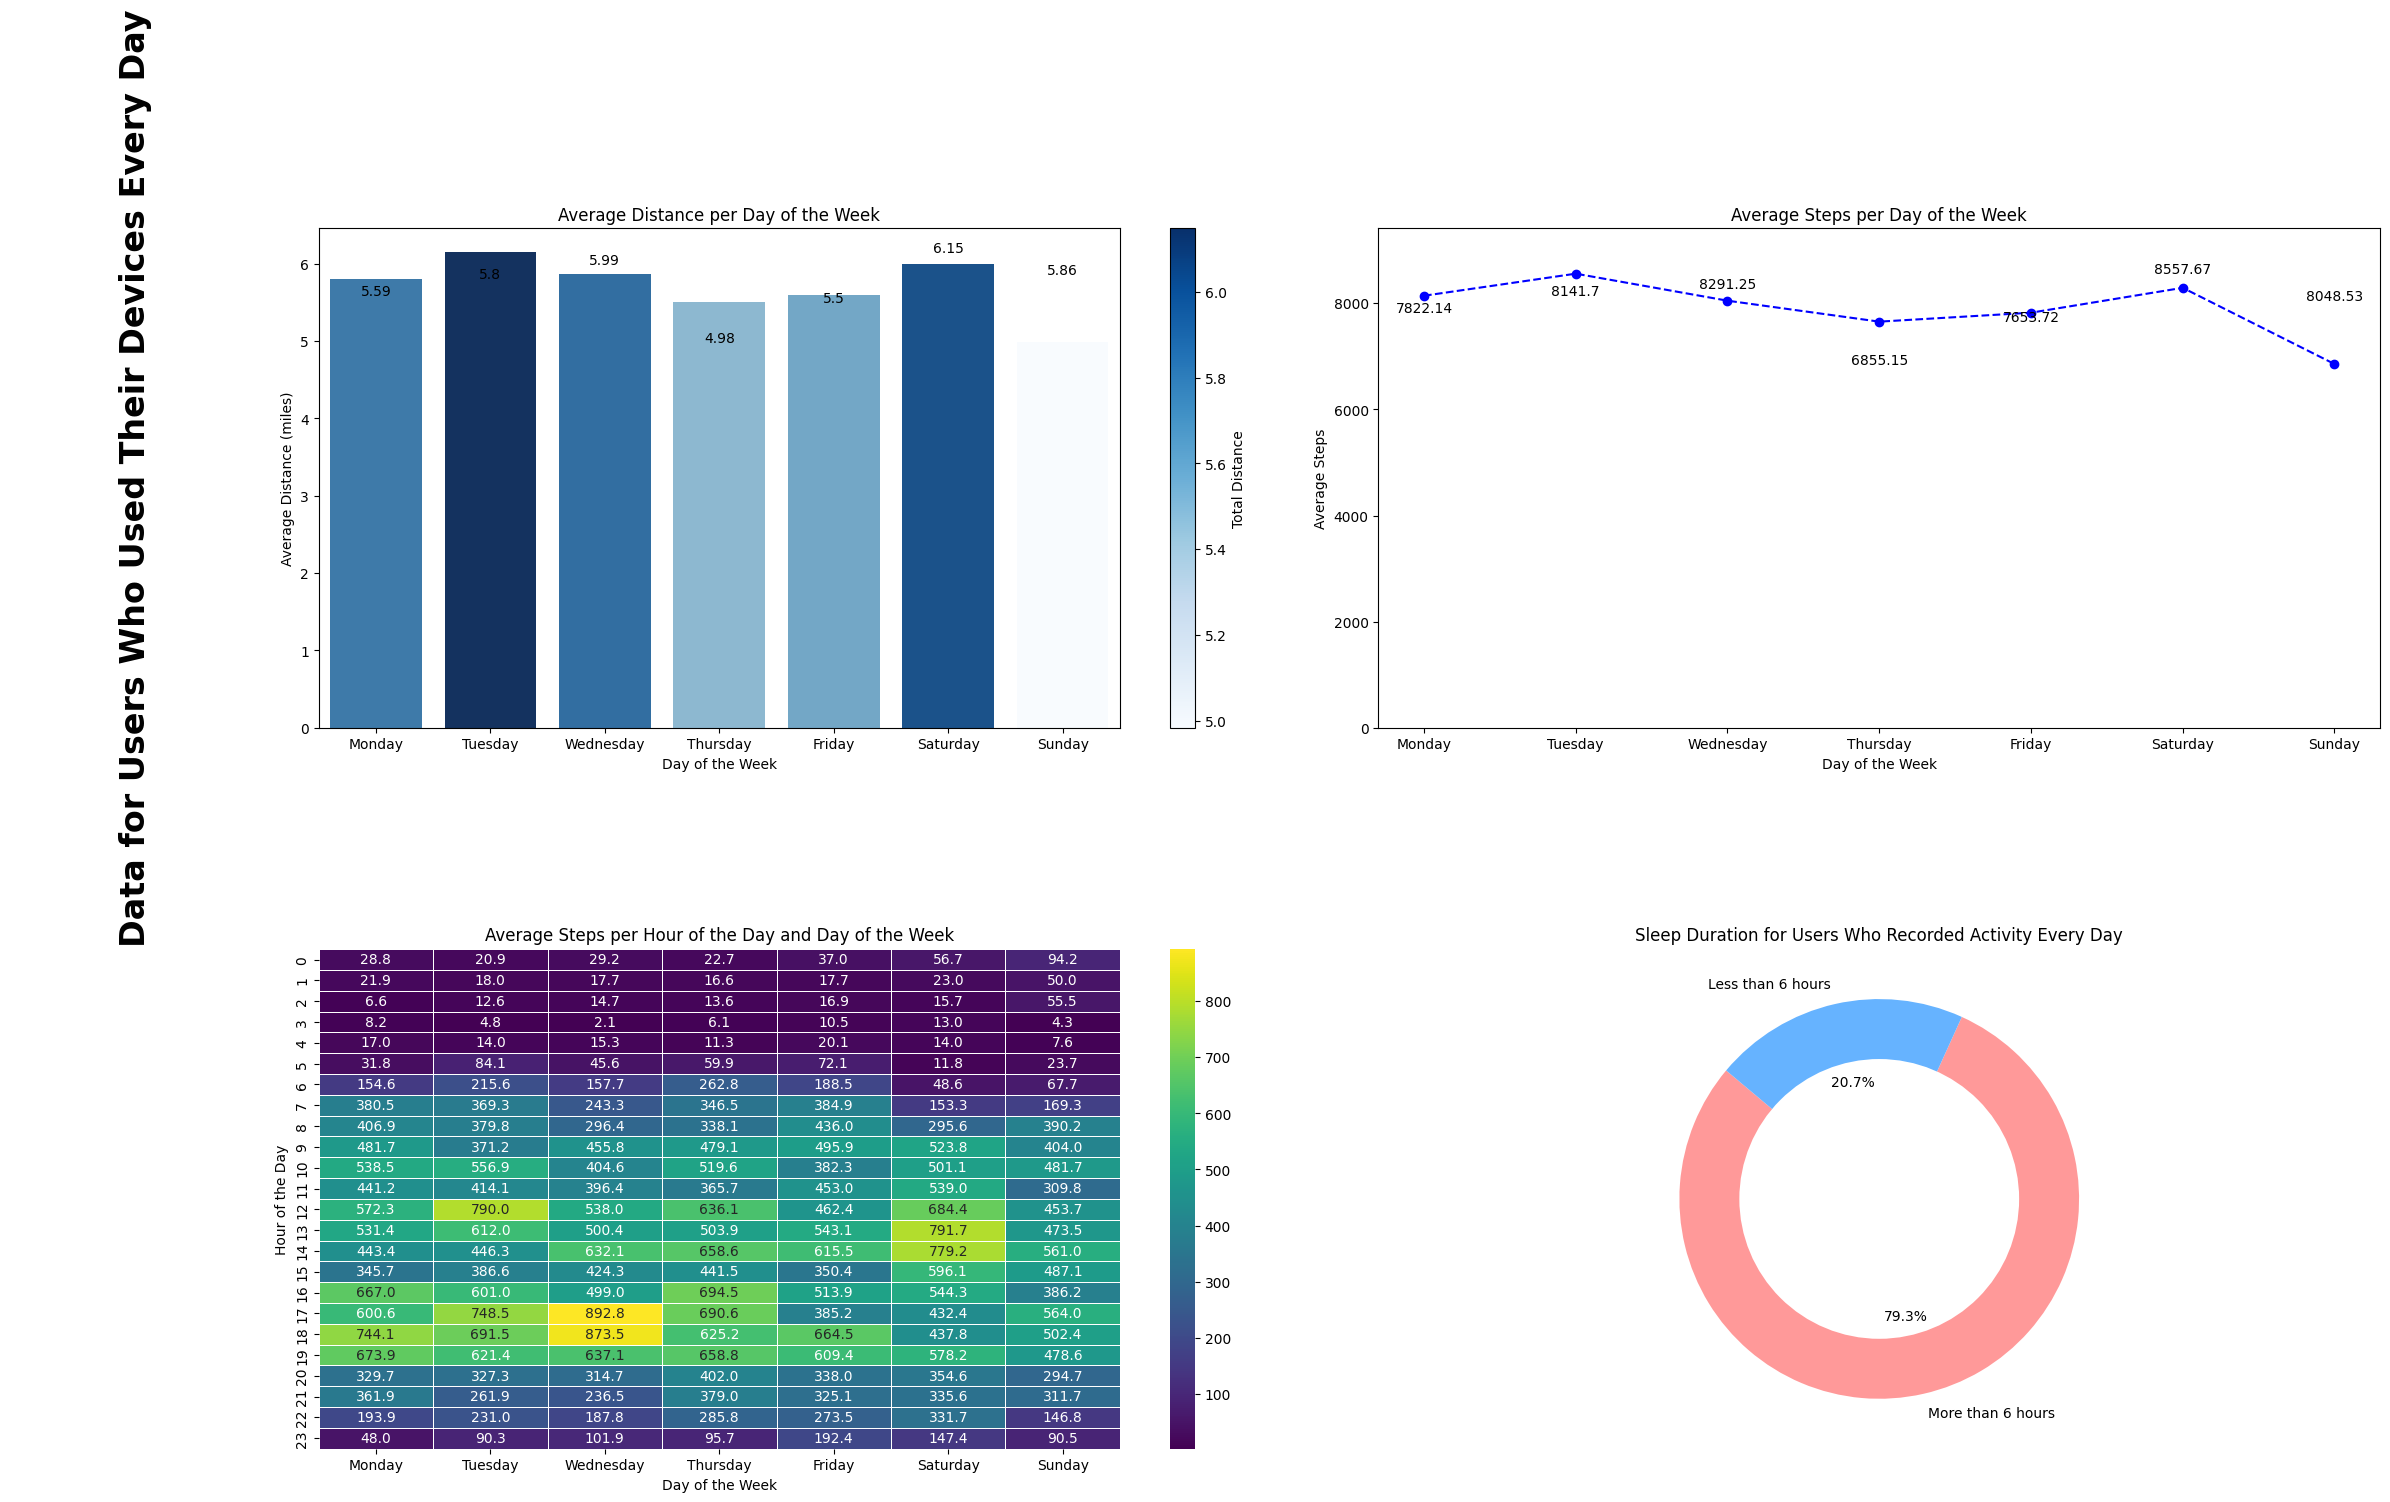

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the file paths
activity_file_path = '../data/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv'  # Replace with your file path
hourly_steps_file_path = '../data/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv'  # Replace with your file path
sleep_file_path = '../data/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv'  # Replace with your file path

# Read the CSV files
df_activity = pd.read_csv(activity_file_path)
df_hourly_steps = pd.read_csv(hourly_steps_file_path)
df_sleep = pd.read_csv(sleep_file_path)

# Convert the ActivityDate column to datetime
df_activity['ActivityDate'] = pd.to_datetime(df_activity['ActivityDate'], format='%m/%d/%Y')
df_hourly_steps['ActivityHour'] = pd.to_datetime(df_hourly_steps['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')
df_sleep['date'] = pd.to_datetime(df_sleep['date'], format='%m/%d/%Y %I:%M:%S %p')

# Extract the day of the week from the ActivityDate column
df_activity['DayOfWeek'] = df_activity['ActivityDate'].dt.day_name()
df_hourly_steps['DayOfWeek'] = df_hourly_steps['ActivityHour'].dt.day_name()
df_hourly_steps['Hour'] = df_hourly_steps['ActivityHour'].dt.hour

# Filter the DataFrames to include only users who recorded activity every day
df_filtered_activity = df_activity[df_activity['Id'].isin(users_every_day_vector)]
df_filtered_hourly = df_hourly_steps[df_hourly_steps['Id'].isin(users_every_day_vector)]
df_filtered_sleep = df_sleep[df_sleep['Id'].isin(users_every_day_vector)].copy()

# Calculate average distance and steps for each day of the week
avg_metrics = df_filtered_activity.groupby('DayOfWeek').agg({
    'TotalDistance': 'mean',
    'TotalSteps': 'mean'
}).reset_index()

# Order the days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_metrics['DayOfWeek'] = pd.Categorical(avg_metrics['DayOfWeek'], categories=days_order, ordered=True)
avg_metrics = avg_metrics.sort_values('DayOfWeek')

# Calculate average steps for each hour of the day and each day of the week
avg_steps_hourly = df_filtered_hourly.groupby(['Hour', 'DayOfWeek'])['StepTotal'].mean().reset_index()

# Pivot the DataFrame to create a grid
steps_pivot = avg_steps_hourly.pivot(index='Hour', columns='DayOfWeek', values='StepTotal')
steps_pivot = steps_pivot[days_order]

# Calculate total sleep duration per day for each user
df_filtered_sleep.loc[:, 'date_only'] = df_filtered_sleep['date'].dt.date
df_filtered_sleep.loc[:, 'SleepDuration'] = df_filtered_sleep.groupby(['Id', 'date_only'])['value'].transform('sum')
df_filtered_sleep.loc[:, 'SleepDuration'] = df_filtered_sleep['SleepDuration'] / 60
df_filtered_sleep.loc[:, 'SleepCategory'] = df_filtered_sleep['SleepDuration'].apply(lambda x: 'Less than 6 hours' if x < 6 else 'More than 6 hours')
df_unique_sleep = df_filtered_sleep.drop_duplicates(subset=['Id', 'date_only'])
sleep_counts = df_unique_sleep['SleepCategory'].value_counts()

# Create the dashboard-like plot
fig, axs = plt.subplots(2, 3, figsize=(24, 15), gridspec_kw={'width_ratios': [1, 4, 4]})

# Add the banner
axs[0, 0].text(0.5, 0.5, 'Data for Users Who Used Their Devices Every Day', 
               verticalalignment='center', horizontalalignment='center', 
               fontsize=24, fontweight='bold', rotation=90, transform=axs[0, 0].transAxes)
axs[0, 0].axis('off')
axs[1, 0].axis('off')

# Plot average distance with color gradient based on value
norm = plt.Normalize(avg_metrics['TotalDistance'].min(), avg_metrics['TotalDistance'].max())
sm = plt.cm.ScalarMappable(cmap="Blues", norm=norm)
sm.set_array([])

colors = sm.to_rgba(avg_metrics['TotalDistance'])

sns.barplot(x='DayOfWeek', y='TotalDistance', data=avg_metrics, palette=colors, dodge=False, ax=axs[0, 1])
axs[0, 1].set_title('Average Distance per Day of the Week')
axs[0, 1].set_xlabel('Day of the Week')
axs[0, 1].set_ylabel('Average Distance (miles)')
for index, row in avg_metrics.iterrows():
    axs[0, 1].text(index, row.TotalDistance, round(row.TotalDistance, 2), color='black', ha="center")

# Add color bar
cbar = fig.colorbar(sm, ax=axs[0, 1], orientation='vertical')
cbar.set_label('Total Distance')

# Plot average steps as a scatter plot with dotted lines
axs[0, 2].plot(avg_metrics['DayOfWeek'], avg_metrics['TotalSteps'], marker='o', linestyle='--', color='b')
axs[0, 2].set_ylim(0, avg_metrics['TotalSteps'].max() * 1.1)  # Set y-axis to start at zero
axs[0, 2].set_title('Average Steps per Day of the Week')
axs[0, 2].set_xlabel('Day of the Week')
axs[0, 2].set_ylabel('Average Steps')
for index, row in avg_metrics.iterrows():
    axs[0, 2].text(index, row.TotalSteps, round(row.TotalSteps, 2), color='black', ha="center")

# Plot the heatmap for hourly steps
sns.heatmap(steps_pivot, cmap='viridis', annot=True, fmt=".1f", linewidths=.5, ax=axs[1, 1])
axs[1, 1].set_title('Average Steps per Hour of the Day and Day of the Week')
axs[1, 1].set_xlabel('Day of the Week')
axs[1, 1].set_ylabel('Hour of the Day')

# Plot the donut chart for sleep duration
axs[1, 2].pie(sleep_counts, labels=sleep_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
axs[1, 2].set_title('Sleep Duration for Users Who Recorded Activity Every Day')

plt.tight_layout()
plt.show()

## Analysis of Trends in Smart Device Usage and Marketing Implications

Based on the trends observed in the smart device usage data, several insights can be drawn to inform the company’s understanding of its customers and influence its marketing strategy.

### Key Trends
Out of 33 users, 21 individuals consistently used their smart devices every day, with peak activity occurring at specific times:
- **Tuesdays at 12:00 PM**
- **Wednesdays between 5:00 PM and 7:00 PM**
- **Saturdays between 1:00 PM and 3:00 PM**

This suggests that the users follow structured schedules, balancing their fitness routines around work and leisure. These time-specific trends align with the broader pattern in the fitness tracker industry, where wearables are commonly used during lunchtime workouts and evening sessions. According to a report from **Statista**, **28% of wearable device users** report exercising more regularly after using fitness trackers, indicating that these devices are powerful motivators for maintaining an active lifestyle ([Statista, 2023](https://www.statista.com/statistics/794849/wearable-device-exercise-more/)).

Additionally, among the 21 everyday users, **20.7% slept less than 6 hours per night**, while the majority slept more than 6 hours. This suggests that a significant portion of users may benefit from better sleep tracking features and education about the importance of rest. According to **Business Insider**, nearly **40% of wearable device users** consider sleep tracking as one of the most important features of their devices ([Business Insider, 2023](https://www.businessinsider.com/sleep-tracking-in-wearable-tech-market-growth-2019-11)).

### Application to the Company’s Customers
These insights suggest that a significant portion of the company’s customer base is already committed to tracking their fitness routines. The peak activity times—lunchtime on Tuesdays and afternoons on Saturdays—highlight opportunities for the company to develop personalized features or fitness plans that align with these schedules. 

For example, users who frequently engage in workouts during lunch breaks or early evening could benefit from **personalized workout suggestions**, reminders, or performance-optimizing features that integrate into their specific routines. These insights align with a trend reported by **Mordor Intelligence**, which highlights the growing role of wearable technology in personalizing fitness experiences, enabling users to optimize workouts based on their habits ([Mordor Intelligence, 2023](https://www.mordorintelligence.com/industry-reports/wearable-fitness-technology-market)).

In addition, the sleep tracking data highlights an opportunity for the company to address the needs of users who are not getting sufficient sleep. Offering features or content related to **sleep hygiene**, **recovery tips**, or even specialized sleep accessories could appeal to a health-conscious segment looking to improve overall wellness.

### Influence on Marketing Strategy
To capitalize on these findings, the company should refine its marketing strategy by segmenting its users based on their activity and sleep patterns. For example:
- **Active users** could be targeted with marketing that emphasizes performance optimization during peak hours. Tailored campaigns might focus on features like real-time feedback, advanced heart rate monitoring, or personalized fitness insights that enhance workout efficiency on high-activity days (e.g., Tuesdays and Saturdays).
- **Users with insufficient sleep** could be targeted with campaigns promoting sleep tracking features, recovery tools, and educational content on the importance of rest. Additionally, the company could consider partnerships with health apps or products that emphasize sleep improvement.

By segmenting users and tailoring marketing messages to their specific needs and habits, the company can position itself not only as a fitness tracker brand but as a comprehensive **health and wellness partner**. This approach aligns with industry-wide shifts where wearable tech is increasingly being used for holistic health management, not just fitness tracking. According to **Allied Market Research**, the global **fitness electronics market** is expected to grow at a compound annual growth rate (CAGR) of **19.6%** from 2020 to 2027, driven by the integration of new features like sleep monitoring and personalized insights ([Allied Market Research, 2023](https://www.alliedmarketresearch.com/fitness-tracker-market-A11348)).

By leveraging these trends, the company can position itself to capture a larger share of the growing market, increasing user engagement and retention while fostering long-term brand loyalty.

---

**References:**
1. [Statista, 2023](https://www.statista.com/statistics/794849/wearable-device-exercise-more/)
2. [Business Insider, 2023](https://www.businessinsider.com/sleep-tracking-in-wearable-tech-market-growth-2019-11)
3. [Mordor Intelligence, 2023](https://www.mordorintelligence.com/industry-reports/wearable-fitness-technology-market)
4. [Allied Market Research, 2023](https://www.alliedmarketresearch.com/fitness-tracker-market-A11348)
